#### 1. Loading required Libraries

In [144]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [145]:
cars = pd.read_csv("../datasets/Car_details_v3.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


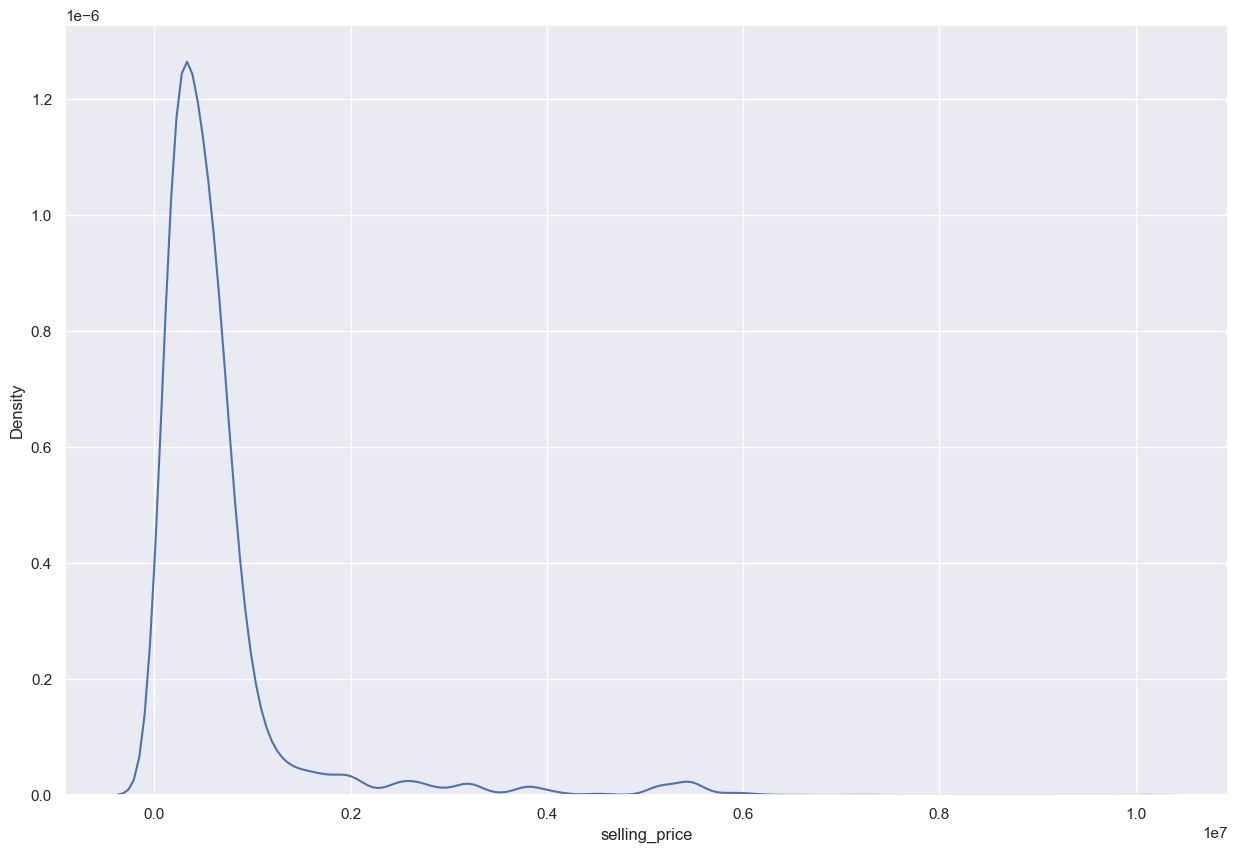

In [146]:
sns.kdeplot(x="selling_price", data=cars)
plt.show()

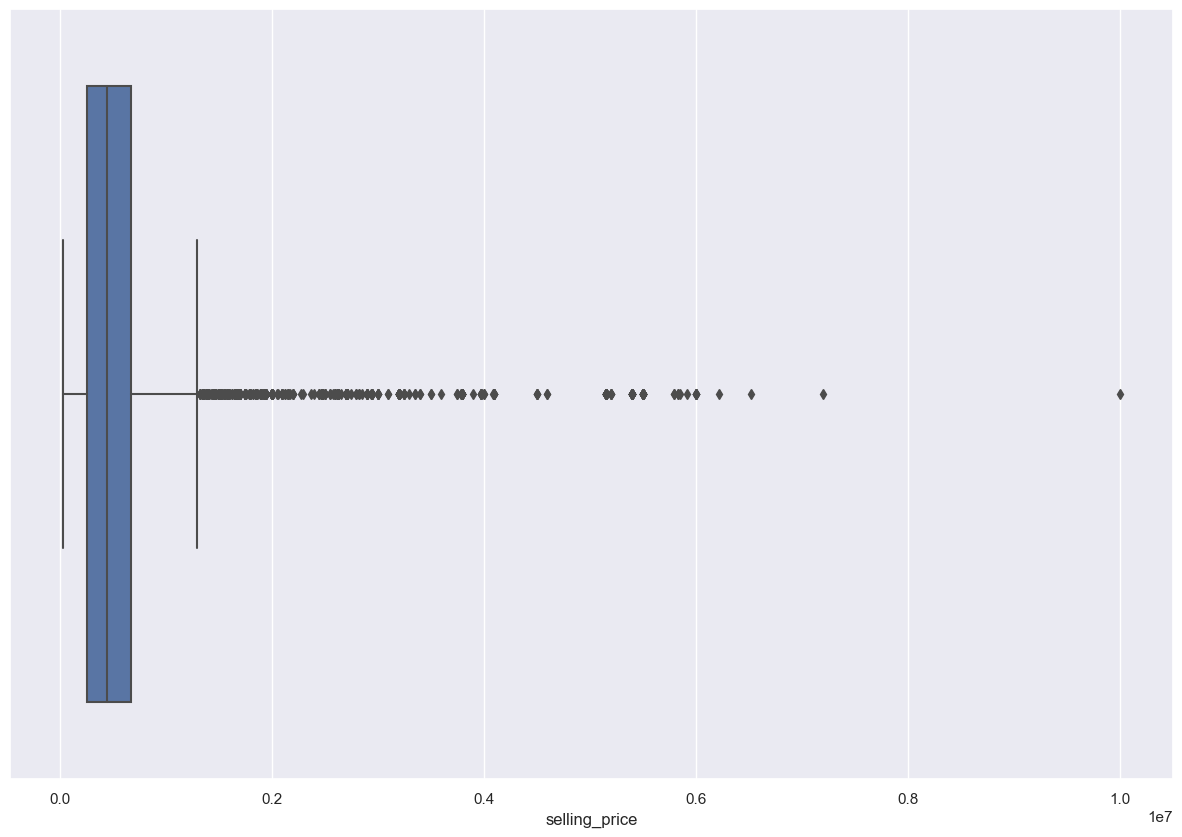

In [147]:
sns.boxplot(x="selling_price", data=cars)
plt.show()

In [148]:
df=cars

q_low = df["selling_price"].quantile(0.75)
q_hi  = df["selling_price"].quantile(0.85)

df_filtered = df[(df["selling_price"] < q_hi) & (df["selling_price"] > q_low)]

In [149]:
df_filtered.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
16,Maruti Ertiga SHVS VDI,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0
19,Hyundai i20 2015-2017 Asta 1.4 CRDi,2016,680000,100000,Diesel,Individual,Manual,First Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
45,Maruti Vitara Brezza VDi,2018,819999,32600,Diesel,Dealer,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
48,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2013,700000,99000,Diesel,Dealer,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,200Nm@ 1400-3400rpm,7.0


In [150]:
df_filtered.shape

(796, 13)

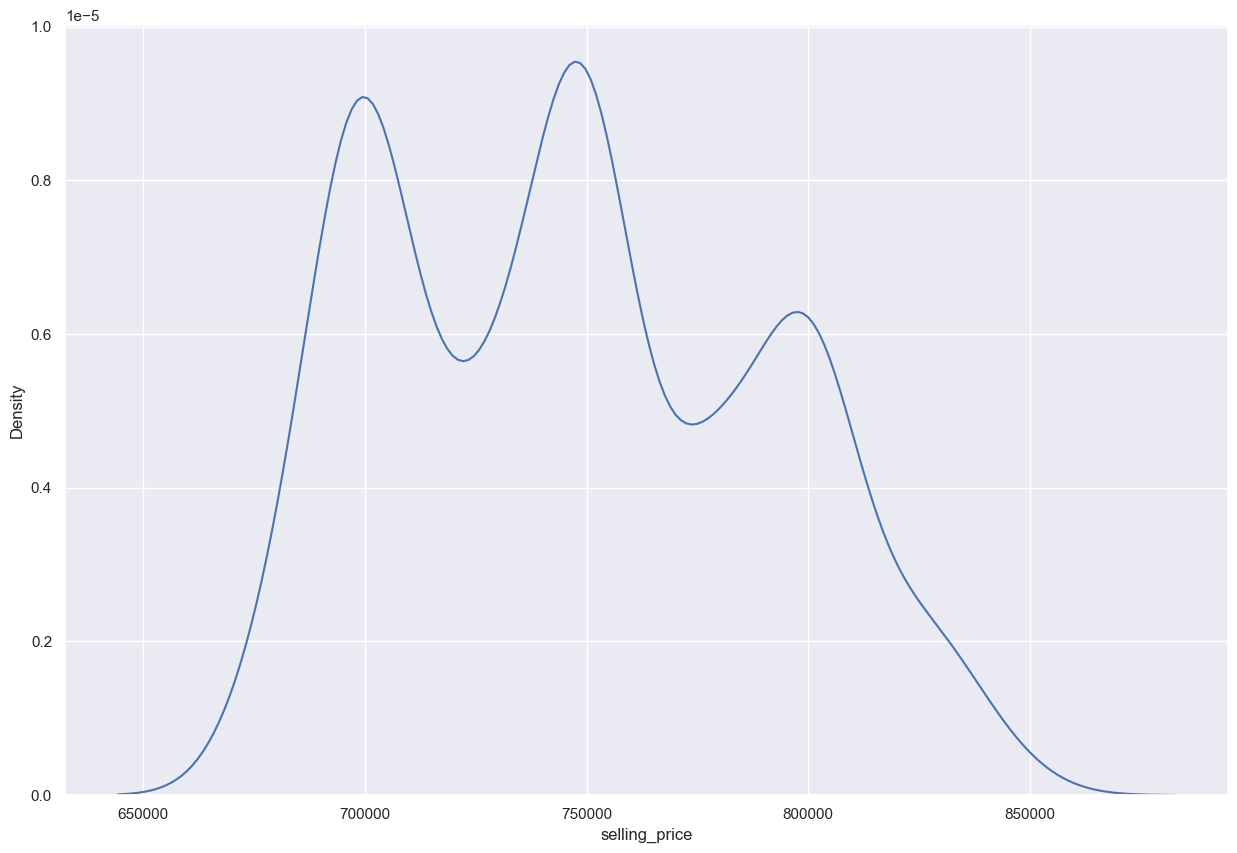

In [151]:
sns.kdeplot(x="selling_price", data=df_filtered)
plt.show()

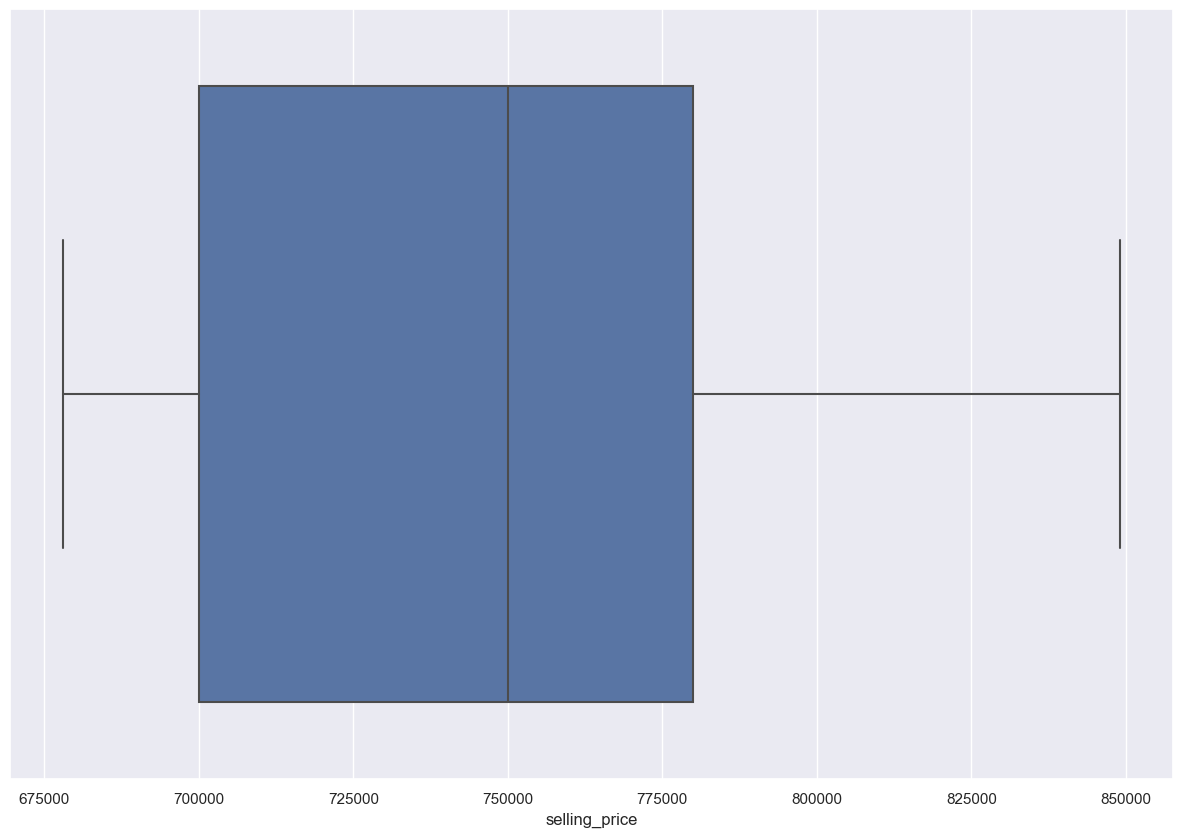

In [152]:
sns.boxplot(x="selling_price", data=df_filtered)
plt.show()

In [153]:
cars = df_filtered

#### 3. Description of Dataset

#### 3.1 Shape of Dataset

In [154]:
shape = cars.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  796 rows\patterns  and 13 features.


#### 3.2 info

In [155]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 16 to 8112
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           796 non-null    object 
 1   year           796 non-null    int64  
 2   selling_price  796 non-null    int64  
 3   km_driven      796 non-null    int64  
 4   fuel           796 non-null    object 
 5   seller_type    796 non-null    object 
 6   transmission   796 non-null    object 
 7   owner          796 non-null    object 
 8   mileage        796 non-null    object 
 9   engine         796 non-null    object 
 10  max_power      796 non-null    object 
 11  torque         796 non-null    object 
 12  seats          796 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 119.4+ KB


#### 3.3 Missing Values for features

In [156]:
[[features,cars[features].isnull().sum()] for features in cars.columns if cars[features].isnull().sum()>0]

[]

#### 3.4 Heat Map for Missing Values

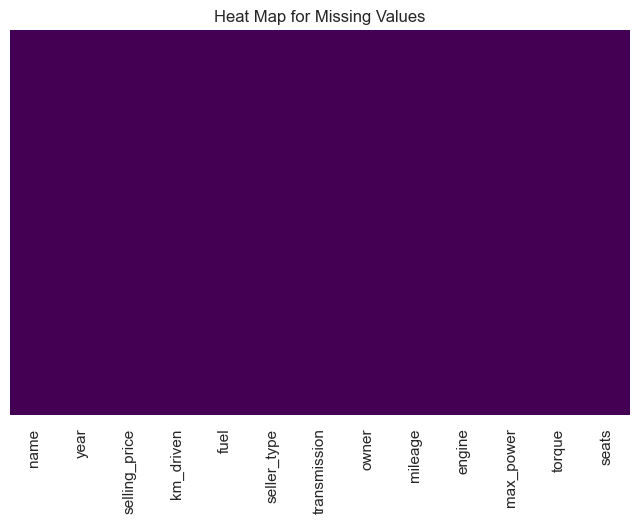

In [157]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### 3.5 Dropping NA values

In [158]:
cars.dropna(inplace=True)

Approximately, **2% values are Na**. Therefore, to simplify things, we dropped them.

#### 4. Exploratory Data Analysis

#### 4.1.1. Type of Owner and Number of Cars

In [159]:
cars['owner'].value_counts()

First Owner             661
Second Owner            124
Third Owner               9
Fourth & Above Owner      2
Name: owner, dtype: int64

#### 4.1.2. Countplot Owner Type Vs Number of Cars

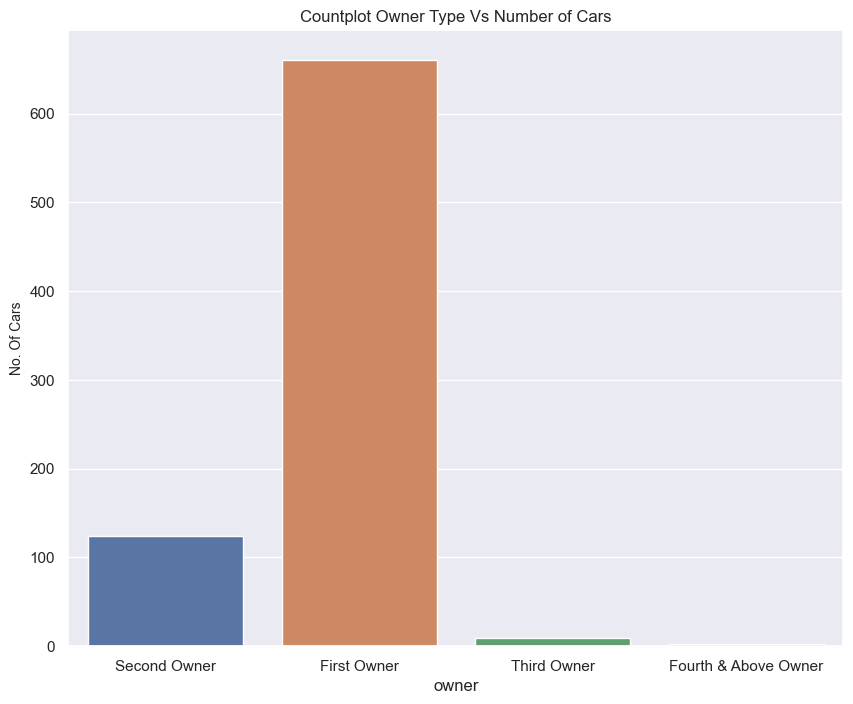

In [160]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Countplot Owner Type Vs Number of Cars")
sns.countplot(x ='owner', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation
**First Owned Cars** are **highest among all**.

#### 4.1.4. Pie Chart Type of Owner Vs Number of cars.

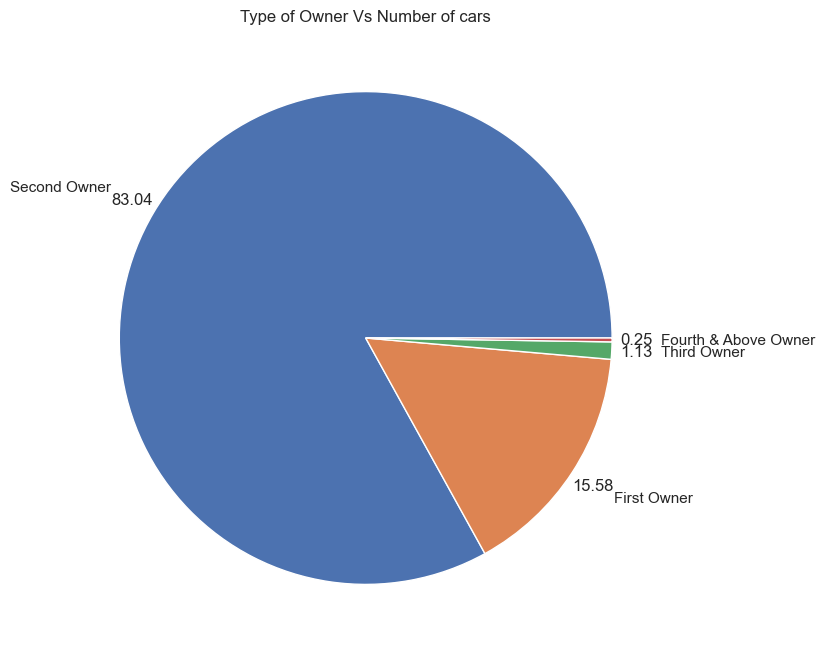

In [161]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Type of Owner Vs Number of cars")
plt.pie(cars['owner'].value_counts(),labels=cars['owner'].unique(),pctdistance=1.1, labeldistance=1.2,autopct='%.2f')
plt.show()

#### Observation

1. **65.96 %** of cars are **First Owned**.
2. **25.50 %** of cars are **Second Owned**.
3. **6.45 %** of cars are **Third Owned**.
4. **2.02 %** of cars are **Fourth and Above Owned**.
5. **0.06 %** of cars are **Test Drive Cars**.

#### 4.2. Barplot Owner Vs Selling Price

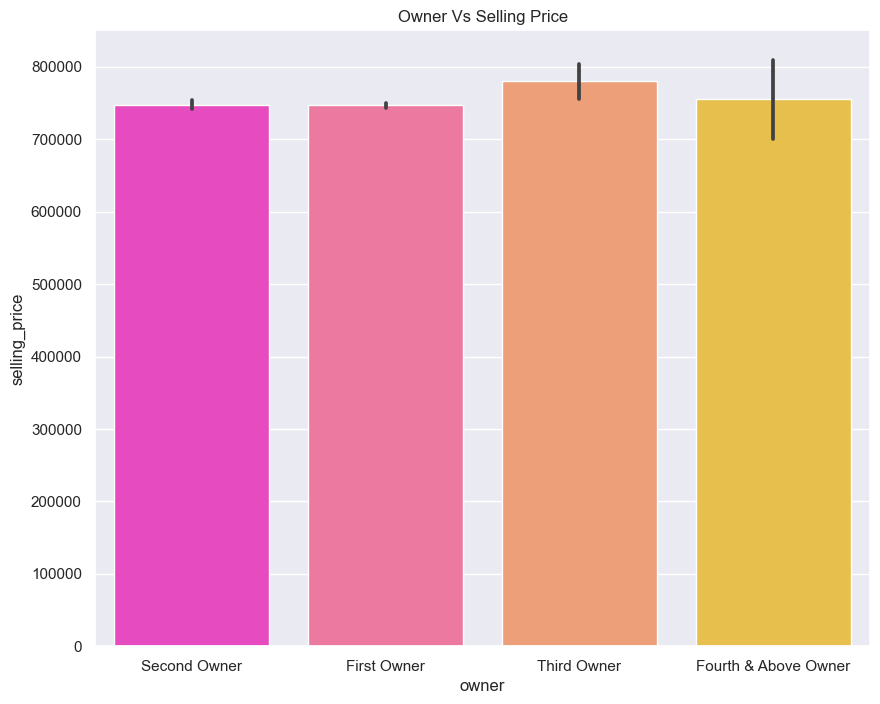

In [162]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Owner Vs Selling Price")
sns.barplot(x='owner',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

**Test Drive cars** have **high average selling price**. 

As **number of owners** increases the **selling price** of car **decreases**.

#### 4.3.1. Automatic Vs Manual

In [163]:
cars['transmission'].value_counts()

Manual       690
Automatic    106
Name: transmission, dtype: int64

#### 4.3.2. Countplot Transmission Vs Number of Cars

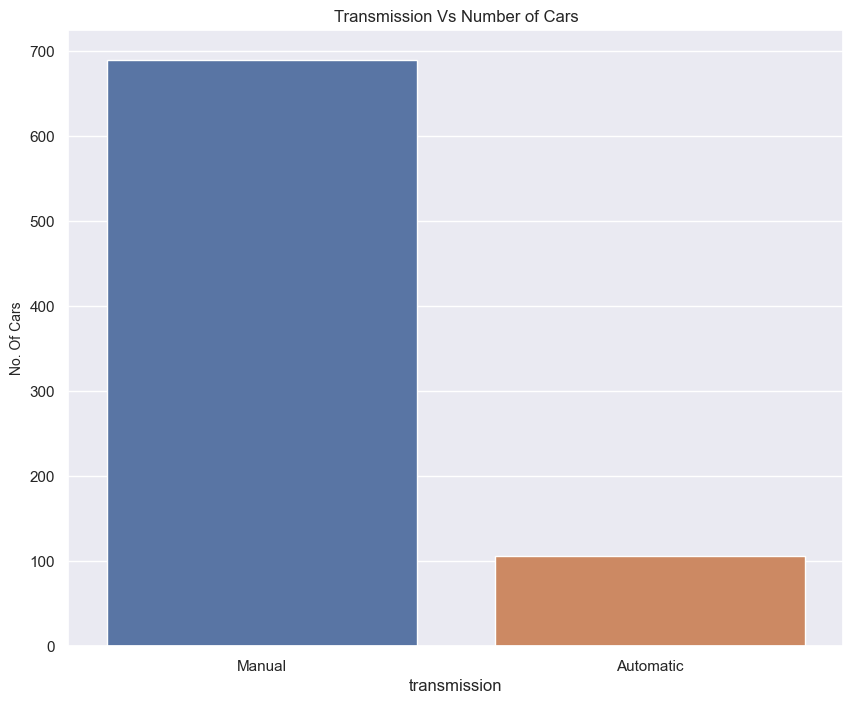

In [164]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Number of Cars")
sns.countplot(x ='transmission', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

Most of the cars are **Manual**.

#### 4.4. Barplot Transmission Vs Selling Price

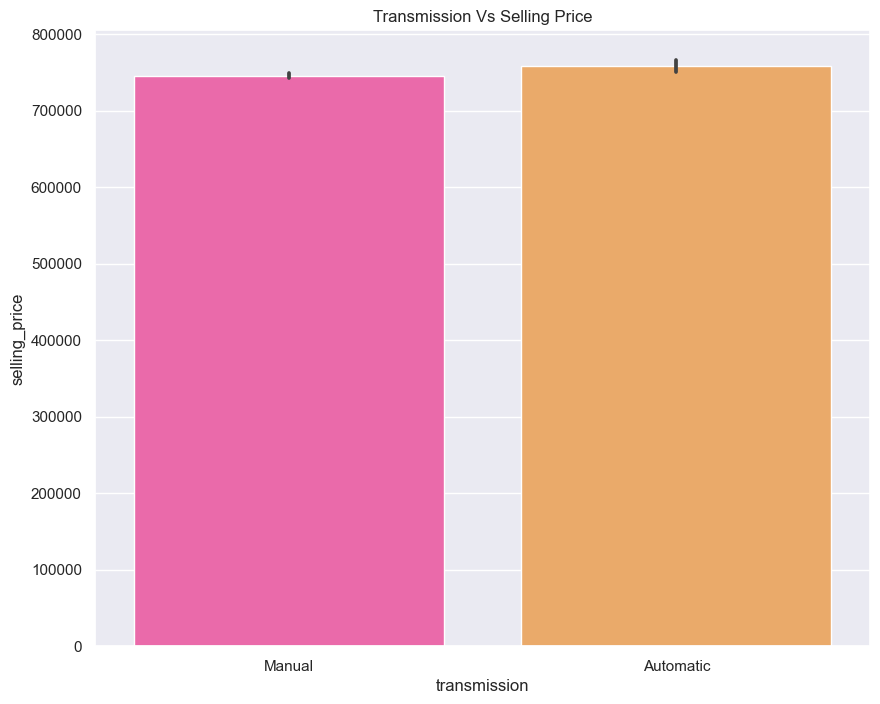

In [165]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Selling Price")
sns.barplot(x='transmission',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

Cars having **Automatic Transmission have high selling price**.

#### 4.5. Countplot Fuel Vs Number of Cars

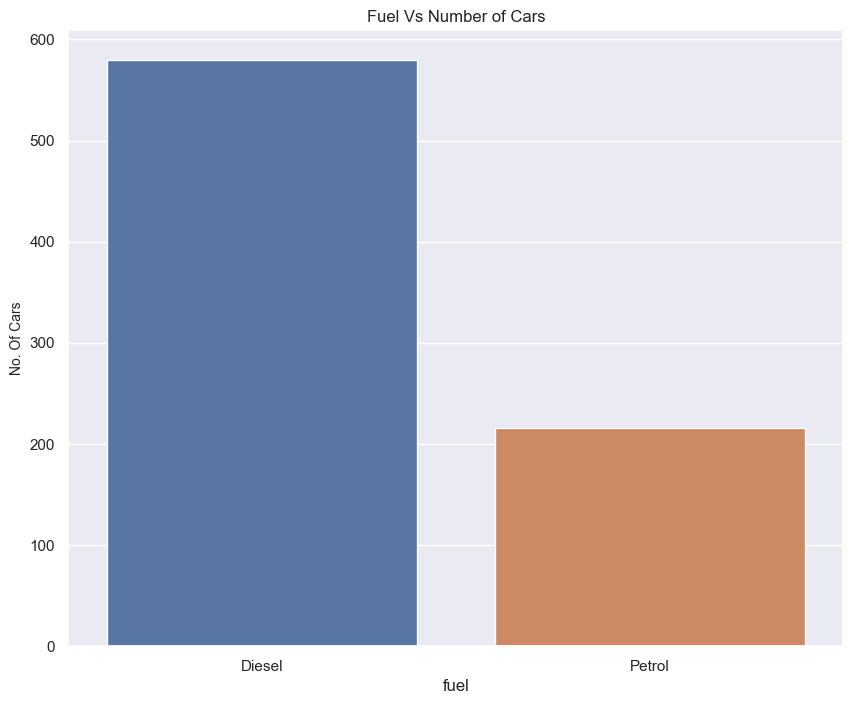

In [166]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Number of Cars")
sns.countplot(x ='fuel', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

Most of the cars are **Diesel**.

#### 4.6. Barplot Fuel Vs Selling Price

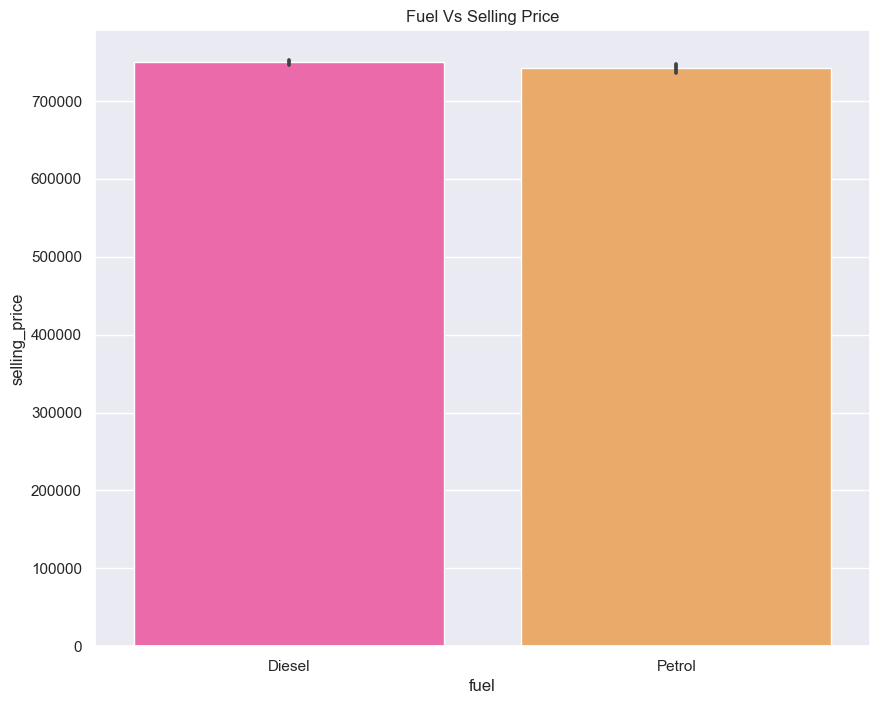

In [167]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Selling Price")
sns.barplot(x='fuel',y='selling_price',data=cars,palette='spring')
plt.show()

#### Observation

**Diesel cars** have **high average selling price**.

#### 4.7. Countplot Number of cars sold per year.

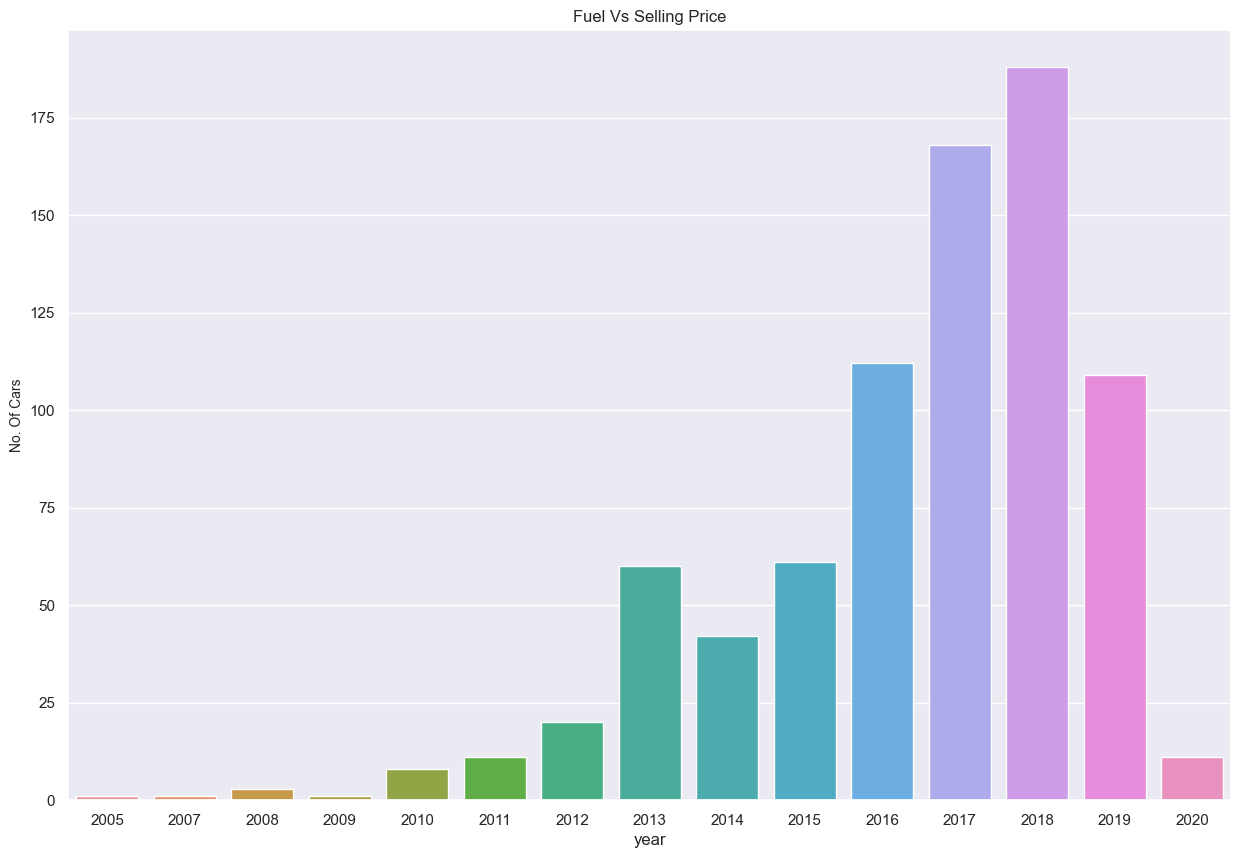

In [168]:
fig = sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Fuel Vs Selling Price")
sns.countplot(x ='year', data = cars).set_ylabel("No. Of Cars", fontsize = 10)
plt.show()

#### Observation

In the year 2017, Most of the cars were sold.

#### 5. Feature Engineering

In [169]:
def feature_eng(cars):
    
    # extracts the company name from name column
    #cars["company"] = cars["name"].str.split().str.slice(start=0,stop=1).str.join(' ')
    
    # extracts the model name from name column
    #cars["model"] = cars["name"].str.split().str.slice(start=1,stop=2).str.join(' ')
    
    cars["name"] = cars["name"].str.split().str.slice(start=1,stop=2).str.join(' ')
    
    # We compute age of car and store it in the age columns
    cars["age"] = date.today().year - cars.year
    
    # extracting numbers from mileage and converting into float
    cars["mileage_kmpl"] = cars.mileage.str.extract(r'(^[0-9]*.[0-9]*)').astype("float64")
    
    # extracting numbers from max_power and converting into float
    cars["max_power_bhp"] = cars.max_power.str.extract(r'(^[0-9]*.[0-9]*)').astype("float64")
    
    # extracting numbers from engine and converting into int
    cars["engine_cc"] = cars.engine.str.extract(r'(^[0-9]*.[0-9]*)').astype(int)
    
    # We encode the owner categories in the order : 
    # 'Test Drive Car' > 'First Owner' > 'Second Owner' > 'Third Owner' > 'Fourth & Above Owner'
    cars["owner"] = cars.owner.map({'Test Drive Car': 5, 'First Owner': 4, 'Second Owner': 3, 'Third Owner': 2, 'Fourth & Above Owner': 1})
    
    # Encoding Transmission values
    cars["transmission_manual"] = cars.transmission.map({'Manual': 1, 'Automatic': 0})

    # Encoding Seller Information in the order: 
    # 'Individual' < 'Dealer' < 'Trustmark Dealer'
    cars["seller_type"] = cars.seller_type.map({'Trustmark Dealer': 3, 'Dealer': 2, 'Individual': 1})

    # converting column seats into int
    cars["seats"] = cars.seats.astype(int)
    
    # columns to remove
    remove_cols = ["year", "mileage","engine","torque","max_power","transmission"]
    
    # removing the columns
    cars.drop(columns =remove_cols, inplace=True)
    
    return cars

In [170]:
cars = feature_eng(cars)
cars.head()

,name,selling_price,km_driven,fuel,seller_type,owner,seats,age,mileage_kmpl,max_power_bhp,engine_cc,transmission_manual
16,Ertiga,778000,70000,Diesel,1,3,7,6,24.52,88.50,1248,1
19,i20,680000,100000,Diesel,1,4,5,6,22.54,88.73,1396,1
33,i20,730000,2388,Petrol,1,4,5,4,18.60,81.83,1197,1
45,Vitara,819999,32600,Diesel,2,4,5,4,24.30,88.50,1248,1
48,Innova,700000,99000,Diesel,2,4,7,9,12.99,100.00,2494,1


In [171]:
df1 = pd.get_dummies(data=cars, columns=['name','fuel'])
df1.columns

Index(['selling_price', 'km_driven', 'seller_type', 'owner', 'seats', 'age',
       'mileage_kmpl', 'max_power_bhp', 'engine_cc', 'transmission_manual',
       'name_7', 'name_A4', 'name_Amaze', 'name_Ameo', 'name_Aspire',
       'name_BR-V', 'name_BRV', 'name_Baleno', 'name_Bolero', 'name_CR-V',
       'name_Captiva', 'name_Ciaz', 'name_City', 'name_Corolla', 'name_Creta',
       'name_Cruze', 'name_Duster', 'name_Dzire', 'name_E-Class',
       'name_EcoSport', 'name_Ecosport', 'name_Elantra', 'name_Elite',
       'name_Endeavour', 'name_Ertiga', 'name_Figo', 'name_Fortuner',
       'name_Freestyle', 'name_GTI', 'name_Glanza', 'name_Grand', 'name_Gypsy',
       'name_Innova', 'name_Jazz', 'name_KUV', 'name_Linea', 'name_Lodgy',
       'name_New', 'name_Nexon', 'name_Passat', 'name_Platinum', 'name_Polo',
       'name_Q7', 'name_Rapid', 'name_S-Cross', 'name_SX4', 'name_Safari',
       'name_Santa', 'name_Scorpio', 'name_Ssangyong', 'name_Sumo',
       'name_Swift', 'name_TUV', 'name_T

In [172]:
df1.sample(4)

,selling_price,km_driven,seller_type,owner,seats,age,mileage_kmpl,max_power_bhp,engine_cc,transmission_manual,...,name_Vitara,name_WR-V,name_X5,name_XUV500,name_Xcent,name_Xylo,name_Zest,name_i20,fuel_Diesel,fuel_Petrol
3279,750000,9900,1,4,8,3,11.96,80.00,1298,1,...,0,0,0,0,0,0,0,0,0,1
6112,780000,35000,1,4,5,4,22.54,88.73,1396,1,...,0,0,0,0,0,0,0,1,1,0
6786,750000,40000,1,4,5,4,20.73,91.10,1373,1,...,0,0,0,0,0,0,0,0,0,1
1112,779000,7032,3,4,5,3,19.00,88.76,1199,0,...,0,0,0,0,0,0,0,0,0,1


#### 6. Model Fitting

#### 6.1. Splitting Data into X and y

In [173]:
X = df1.drop(columns =['selling_price'])
y = df1['selling_price']

#### 6.2. Importing libraries for model fitting

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [176]:
X_train.shape

(636, 78)

In [177]:
X_test.shape

(160, 78)

In [178]:
len(X_train.columns)

78

In [179]:
import tensorflow as tf
from tensorflow import keras

In [183]:
model = keras.Sequential([
    keras.layers.Dense(70, input_shape=(78,), activation='relu'),
    keras.layers.Dense(130, input_shape=(70,), activation='relu'),
    keras.layers.Dense(250, input_shape=(130,), activation='relu'),
    keras.layers.Dense(450, input_shape=(250,), activation='relu'),
    keras.layers.Dense(800, input_shape=(450,), activation='relu'),
    keras.layers.Dense(1500, input_shape=(800,), activation='relu'),

    keras.layers.Dense(1, activation='linear'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

tf.device('/device:GPU:0')

model.fit(X_train, y_train, epochs=10000)

Epoch 1/10000
20/20 [==============================] - 0s 2ms/step - loss: 349885890560.0000 - accuracy: 0.0000e+00
Epoch 2/10000
20/20 [==============================] - 0s 2ms/step - loss: 255596773376.0000 - accuracy: 0.0000e+00
Epoch 3/10000
20/20 [==============================] - 0s 2ms/step - loss: 228346511360.0000 - accuracy: 0.0000e+00
Epoch 4/10000
20/20 [==============================] - 0s 2ms/step - loss: 247244046336.0000 - accuracy: 0.0000e+00
Epoch 5/10000
20/20 [==============================] - 0s 2ms/step - loss: 241245306880.0000 - accuracy: 0.0000e+00
Epoch 6/10000
20/20 [==============================] - 0s 2ms/step - loss: 196437557248.0000 - accuracy: 0.0000e+00
Epoch 7/10000
20/20 [==============================] - 0s 2ms/step - loss: 183920345088.0000 - accuracy: 0.0000e+00
Epoch 8/10000
20/20 [==============================] - 0s 2ms/step - loss: 139607572480.0000 - accuracy: 0.0000e+00
Epoch 9/10000
20/20 [==============================] - 0s 2ms/step - los